In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
sys.path.append('/Users/zzhang/Workspace/SpyDust/')
# sys.path.append('/Users/user/projects/SpyDust/')

from SpyDust.Grain import *

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/zzhang/Workspace/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


/Users/zzhang/Workspace/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


## Grain size and shape distribution

In [2]:
grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=True, normalize=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab

## An example of the angular momentum distribution: 
### $f(\Omega|a, \beta, \mu)$  (given grain properties)

In [3]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [4]:
from SpyDust.util import cgsconst
from SpyDust.AngMomDist import log_f_rot
from SpyDust.charge_dist import charge_dist

debye = cgsconst.debye
env = CNM_params
dip_per_at = env['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
print(a, beta)

5.3382803478865665e-08 -0.3425


### $\beta$

In [5]:
beta

np.float64(-0.3425)

In [6]:
a_tab

array([3.63692806e-08, 3.92706459e-08, 4.24034681e-08, 4.57862116e-08,
       4.94388141e-08, 5.33828035e-08, 5.76414253e-08, 6.22397794e-08,
       6.72049679e-08, 7.25662551e-08, 7.83552398e-08, 8.46060418e-08,
       9.13555025e-08, 9.86434026e-08, 1.06512696e-07, 1.15009764e-07,
       1.24184686e-07, 1.34091540e-07, 1.44788714e-07, 1.56339257e-07,
       1.68811247e-07, 1.82278192e-07, 1.96819464e-07, 2.12520768e-07,
       2.29474647e-07, 2.47781025e-07, 2.67547796e-07, 2.88891465e-07,
       3.11937828e-07, 3.36822719e-07])

Text(0.5, 0, '$\\log \\Omega$')

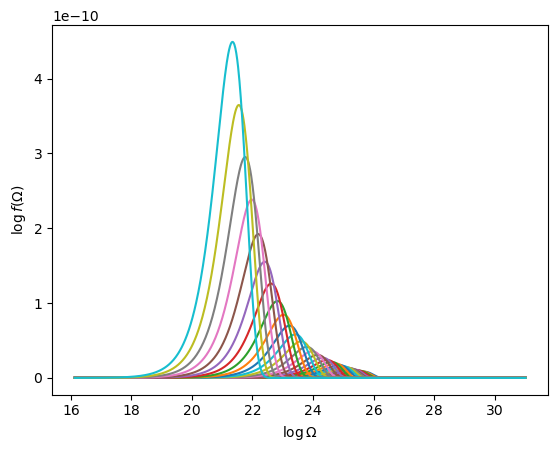

In [7]:
env = WNM_params
# fZ = charge_dist(env, a, beta)
# Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
# mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
# mu_ip = np.array([mu_rms * np.sqrt(ip)])
# mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
#log_omegas, log_f_rot = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000) 

for a in a_tab:
    fZ = charge_dist(env, a, beta)
    Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
    mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
    mu_ip = np.array([mu_rms * np.sqrt(ip)])
    mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
    omegas, log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)
    plt.plot(omegas, np.exp(log_rot_dist[0]))
#plt.xscale('log')
plt.ylabel(r'$\log f(\Omega)$')
plt.xlabel(r'$\log \Omega$')
#plt.ylim(-60, -10)


In [8]:
from SpyDust_ME.util import homogeneous_dist
from full_Stokes import full_Stokes_SED

In [9]:
class spdust_conditional_SED:
    def __init__(self, obs_omegas, int_dist_func=homogeneous_dist, ext_dist_func=homogeneous_dist, impulse=None):
        self.obs_omegas = obs_omegas
        self.int_dist_func = int_dist_func
        self.ext_dist_func = ext_dist_func
        self.impulse = impulse

    @staticmethod
    def generate_loglog_rot_dist_func(env, a, beta, mu, ip):
        fZ = charge_dist(env, a, beta)
        mu_ip = np.array([mu * np.sqrt(ip)])
        mu_op = np.array([mu * np.sqrt(1 - ip)])
        log_Omegas, log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)
        return log_Omegas, log_rot_dist[0]

    def generate(self, env, a, beta, mu, ip):
        self.log_omegas, self.log_rot_dist = self.generate_loglog_rot_dist_func(env, a, beta, mu, ip)
        spdust_model = full_Stokes_SED(rot_freq_grid=self.log_omegas, rot_dist_grid=self.log_rot_dist,
                                       log_freq=True, log_dist=True)
        result = spdust_model.generate_SED(self.obs_omegas, beta, ip, mu**2,
                                            internal_dist=self.int_dist_func, 
                                            impulse=self.impulse,
                                            external_dist=self.ext_dist_func, 
                                            max_workers=1, 
                                            full_Stokes=False)

        return result

In [10]:
obs_omegas_min = 2*np.pi*3e9
obs_omegas_max = 2*np.pi*3e11
obs_omegas_num = 1000
obs_omegas = makelogtab(obs_omegas_min , obs_omegas_max , obs_omegas_num)

spd_model = spdust_conditional_SED(obs_omegas)

In [11]:
debye = cgsconst.debye
env = CNM_params
dip_per_at = env['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)

In [12]:
spd_SED = spd_model.generate(CNM_params, a, beta, mu_rms, 2/3)

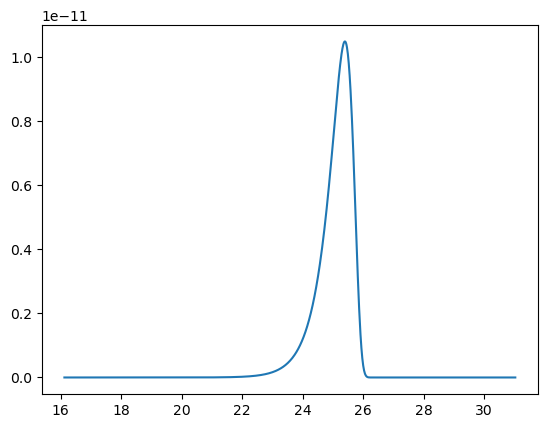

In [13]:
plt.plot(spd_model.log_omegas, np.exp(spd_model.log_rot_dist))
#plt.ylim(-100, 10)

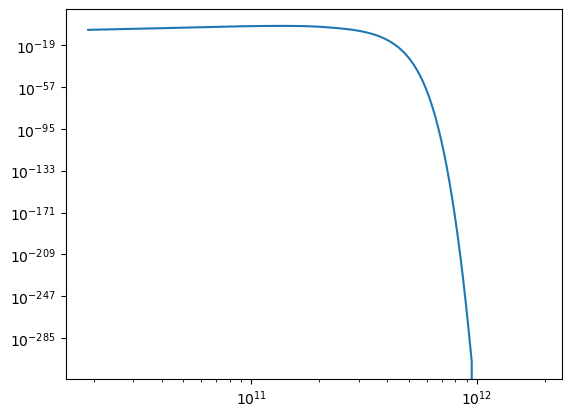

In [14]:
plt.plot(obs_omegas, spd_SED)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-20, 1e-1)

## Perturbative SEDs

In [15]:

CNM_perturbed_nh = {'nh' : 40, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_T = {'nh' : 30, 'T': 150., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_Chi = {'nh' : 30, 'T': 100., 'Chi': 1.5, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xh = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.8e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xC = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 4e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_y = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0.3, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_gamma = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0.3, 'dipole': 9.3, 'line':7}
CNM_perturbed_dipole = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 10.5, 'line':7}

In [ ]:
spd_SED_0 = spd_model.generate(CNM_params, a, beta, mu_rms, 2/3)

spd_SED_perturbed_a = spd_model.generate(CNM_params, 0.9*a, beta, mu_rms, 2/3)
spd_SED_perturbed_beta = spd_model.generate(CNM_params, a, 0.9*beta, mu_rms, 2/3)
spd_SED_perturbed_mu = spd_model.generate(CNM_params, a, beta, 0.9*mu_rms, 2/3)
spd_SED_perturbed_ip = spd_model.generate(CNM_params, a, beta, mu_rms, 0.9*2/3)

spd_SED_deri_a = (spd_SED_perturbed_a - spd_SED_0) / (-0.1 * a)
spd_SED_deri_beta = (spd_SED_perturbed_beta - spd_SED_0) / (-0.1 * beta)
spd_SED_deri_mu = (spd_SED_perturbed_mu - spd_SED_0) / (-0.1 * mu_rms)
spd_SED_deri_ip = (spd_SED_perturbed_ip - spd_SED_0) / (-0.1 * ip)




In [32]:
spd_SED_perturbed_nh = spd_model.generate(CNM_perturbed_nh, a, beta, mu_rms, 2/3)
spd_SED_perturbed_T = spd_model.generate(CNM_perturbed_T, a, beta, mu_rms, 2/3)
spd_SED_perturbed_Chi = spd_model.generate(CNM_perturbed_Chi, a, beta, mu_rms, 2/3)
spd_SED_perturbed_xh = spd_model.generate(CNM_perturbed_xh, a, beta, mu_rms, 2/3)
spd_SED_perturbed_xC = spd_model.generate(CNM_perturbed_xC, a, beta, mu_rms, 2/3)
spd_SED_perturbed_y = spd_model.generate(CNM_perturbed_y, a, beta, mu_rms, 2/3)
spd_SED_perturbed_gamma = spd_model.generate(CNM_perturbed_gamma, a, beta, mu_rms, 2/3)
spd_SED_perturbed_dipole = spd_model.generate(CNM_perturbed_dipole, a, beta, mu_rms, 2/3)

spd_deri_SED_nh = (spd_SED_perturbed_nh-spd_SED_0)/(CNM_perturbed_nh['nh']-CNM_params['nh'])
spd_deri_SED_T = (spd_SED_perturbed_T-spd_SED_0)/(CNM_perturbed_T['T']-CNM_params['T'])
spd_deri_SED_Chi = (spd_SED_perturbed_Chi-spd_SED_0)/(CNM_perturbed_Chi['Chi']-CNM_params['Chi'])
spd_deri_SED_xh = (spd_SED_perturbed_xh-spd_SED_0)/(CNM_perturbed_xh['xh']-CNM_params['xh'])
spd_deri_SED_xC = (spd_SED_perturbed_xC-spd_SED_0)/(CNM_perturbed_xC['xC']-CNM_params['xC'])
spd_deri_SED_y = (spd_SED_perturbed_y-spd_SED_0)/(CNM_perturbed_y['y']-CNM_params['y'])
spd_deri_SED_gamma = (spd_SED_perturbed_gamma-spd_SED_0)/(CNM_perturbed_gamma['gamma']-CNM_params['gamma'])
spd_deri_SED_dipole = (spd_SED_perturbed_dipole-spd_SED_0)/(CNM_perturbed_dipole['dipole']-CNM_params['dipole'])

In [56]:
def normalise_derivative_SEDs(deri_SED_list):
    result = []
    for i in range(len(deri_SED_list)):
        norm = np.linalg.norm(deri_SED_list[i])
        result.append(deri_SED_list[i]/norm)
    return result

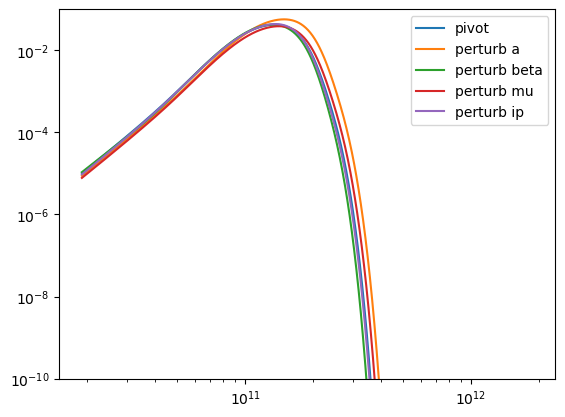

In [33]:
plt.plot(obs_omegas, spd_SED_0, label='pivot')
plt.plot(obs_omegas, spd_SED_perturbed_a, label='perturb a')
plt.plot(obs_omegas, spd_SED_perturbed_beta, label='perturb beta')
plt.plot(obs_omegas, spd_SED_perturbed_mu, label='perturb mu')
plt.plot(obs_omegas, spd_SED_perturbed_ip, label='perturb ip')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10, 1e-1)

plt.legend()

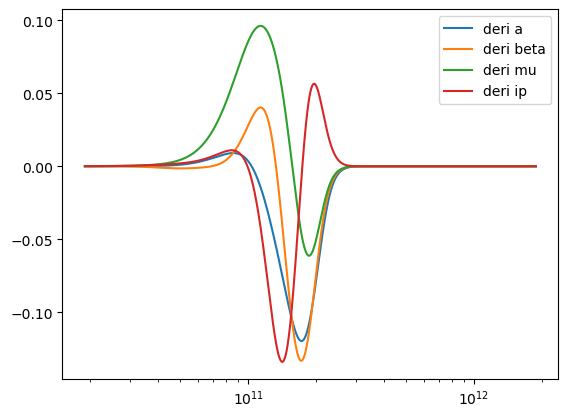

In [31]:
plt.plot(obs_omegas, spd_SED_deri_a/np.linalg.norm(spd_SED_deri_a), label='deri a')
plt.plot(obs_omegas, spd_SED_deri_beta/np.linalg.norm(spd_SED_deri_beta), label='deri beta')
plt.plot(obs_omegas, spd_SED_deri_mu/np.linalg.norm(spd_SED_deri_mu), label='deri mu')
plt.plot(obs_omegas, spd_SED_deri_ip/np.linalg.norm(spd_SED_deri_ip), label='deri ip')

plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-10, 1e-1)

plt.legend()

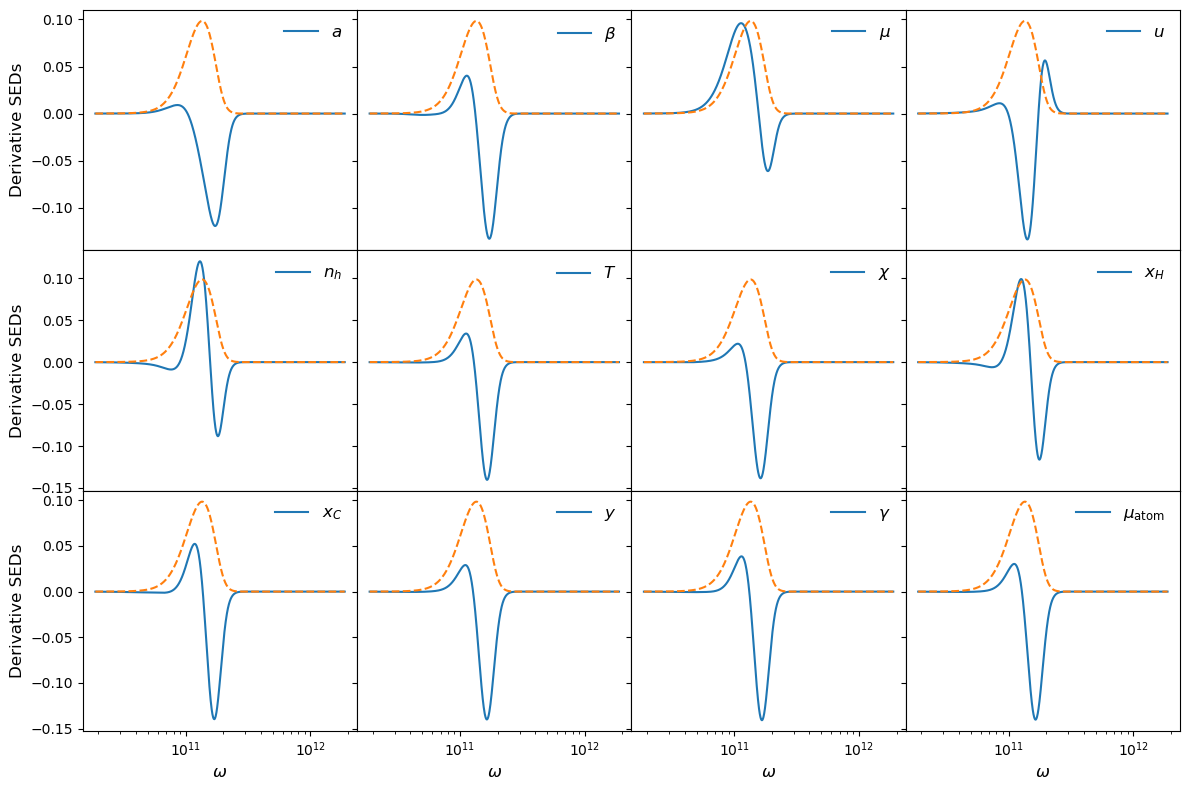

In [67]:
my_data = [spd_SED_deri_a, spd_SED_deri_beta, spd_SED_deri_mu, spd_SED_deri_ip,
           spd_deri_SED_nh, spd_deri_SED_T, spd_deri_SED_Chi, 
           spd_deri_SED_xh, spd_deri_SED_xC, spd_deri_SED_y, 
           spd_deri_SED_gamma, spd_deri_SED_dipole]
my_labels = [r'$a$', r'$\beta$', r'$\mu$', r'$u$',
              r'$n_h$', r'$T$', r'$\chi$',
              r'$x_H$', r'$x_C$', r'$y$',
              r'$\gamma$', r'$\mu_{\rm atom}$']

fig, axs = plt.subplots(3, 4, figsize=(12, 8), 
                       sharex='col', sharey='row',
                       gridspec_kw={'hspace': 0, 'wspace': 0})

normed_SED0 = spd_SED_0 / np.linalg.norm(spd_SED_0)

# Plot your 12 datasets
for i, ax in enumerate(axs.flat):
    # Replace this with your actual plotting logic
    ax.plot(obs_omegas, my_data[i]/np.linalg.norm(my_data[i]), label=my_labels[i])
    ax.plot(obs_omegas, normed_SED0, '--')
    ax.set_xscale('log')

    # legend
    ax.legend(loc='upper right', fontsize=12, frameon=False)
    
    # Only show labels on bottom/left edges
    if ax.get_subplotspec().is_first_row():
        ax.tick_params(labelbottom=False)
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel(r'$\omega$', fontsize=12)
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Derivative SEDs', fontsize=12)


plt.tight_layout()
plt.savefig('SED_derivatives.pdf', dpi=300)

## Dimension reduction

In [57]:
# Dimension reduction of the derivative spectra (perturbed SEDs)
# using PCA

import numpy as np
from sklearn.decomposition import PCA

# Assuming your vectors are stored in a list called 'data_vectors'
# Convert to 2D array (n_samples x n_features)

my_normalised_data = normalise_derivative_SEDs(my_data)
X = np.vstack(my_normalised_data)

# Center the data (PCA requires zero-mean)
X_centered = X - np.mean(X, axis=0)

# Perform PCA
pca = PCA()
pca.fit(X_centered)

# Get the principal components (modes)
components = pca.components_  # Eigenvectors sorted by importance

# Explained variance ratios
variance_ratios = pca.explained_variance_ratio_

# To select top k modes that explain 95% variance:
cumulative_variance = np.cumsum(variance_ratios)
k = np.argmax(cumulative_variance >= 0.95) + 1
top_components = components[:k]

print(f"Top {k} components explain {cumulative_variance[k-1]:.1%} variance")

Top 3 components explain 97.2% variance


Text(0.5, 1.0, 'Scree Plot')

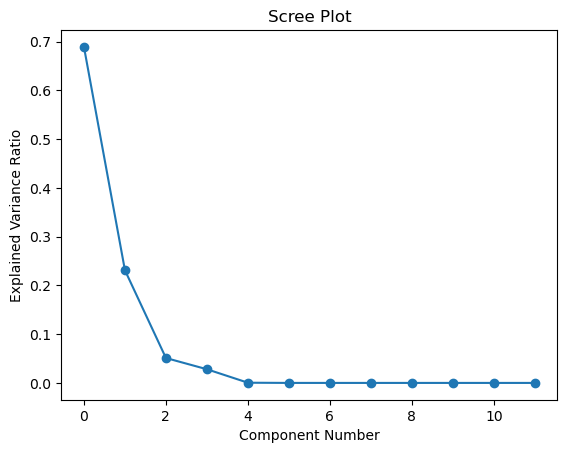

In [58]:
plt.plot(variance_ratios, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

Text(0, 0.5, 'PC2 (23.1%)')

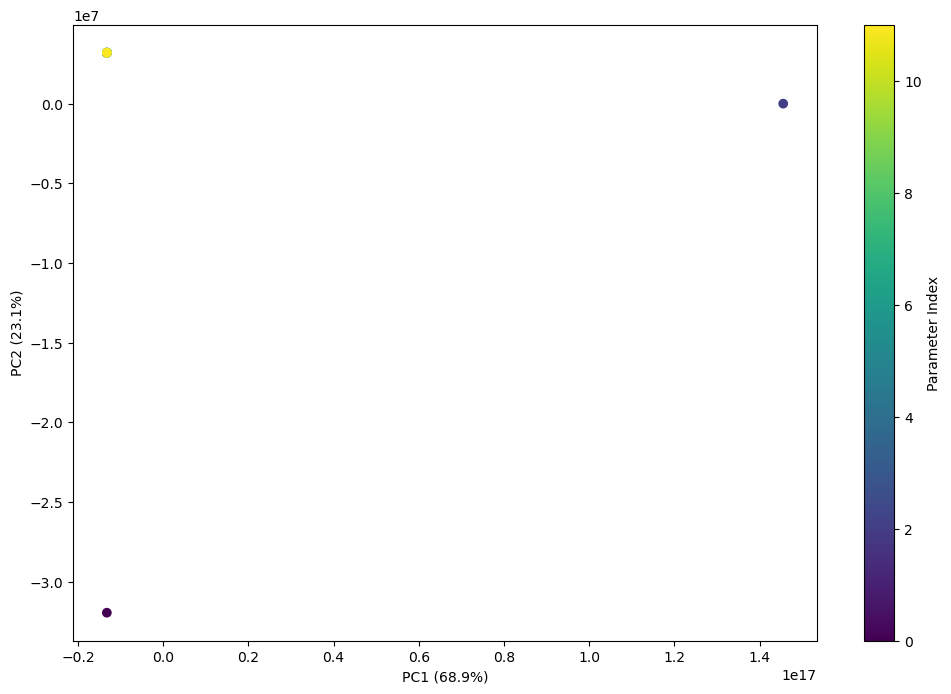

In [61]:
plt.figure(figsize=(12,8))
# 参数投影
scatter = plt.scatter(principal_components[:,0], principal_components[:,1], c=range(12), cmap='viridis')

# 频率点载荷箭头
for i in range(0, len(pca.components_[0]), 10):  # 每10个频率点采样
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], 
              color='r', alpha=0.5, head_width=0.05)
    
plt.colorbar(scatter, label='Parameter Index')
plt.xlabel('PC1 (%.1f%%)' % (variance_ratios[0]*100))
plt.ylabel('PC2 (%.1f%%)' % (variance_ratios[1]*100))

Text(0.5, 1.0, 'Component Patterns')

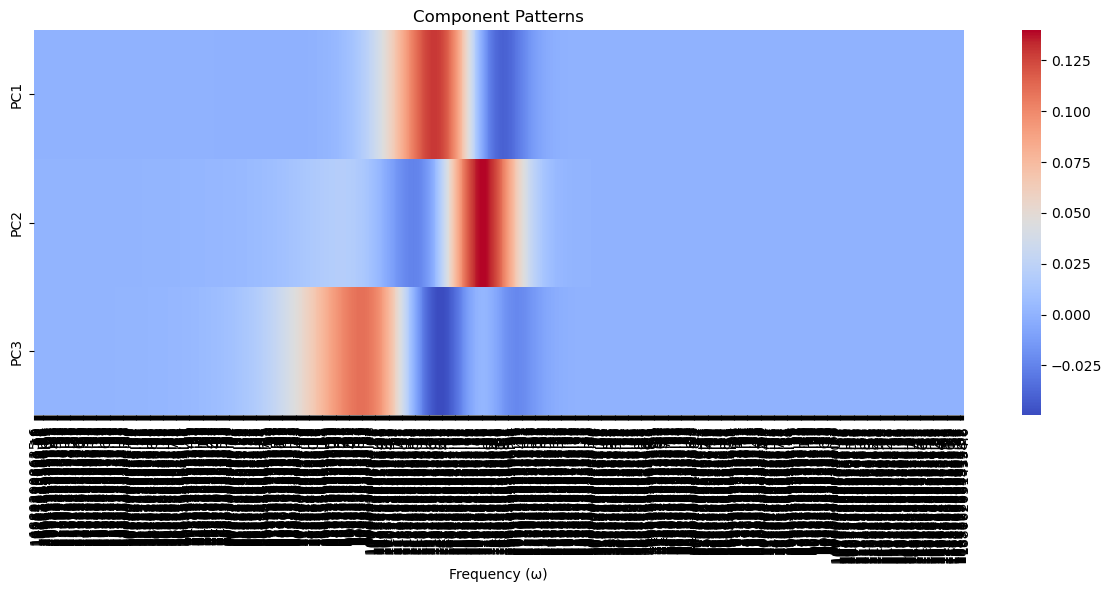

In [63]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(pca.components_[:3], 
            cmap='coolwarm',
            xticklabels=np.round(obs_omegas,2),
            yticklabels=['PC1','PC2','PC3'])
plt.xlabel('Frequency (ω)')
plt.title('Component Patterns')

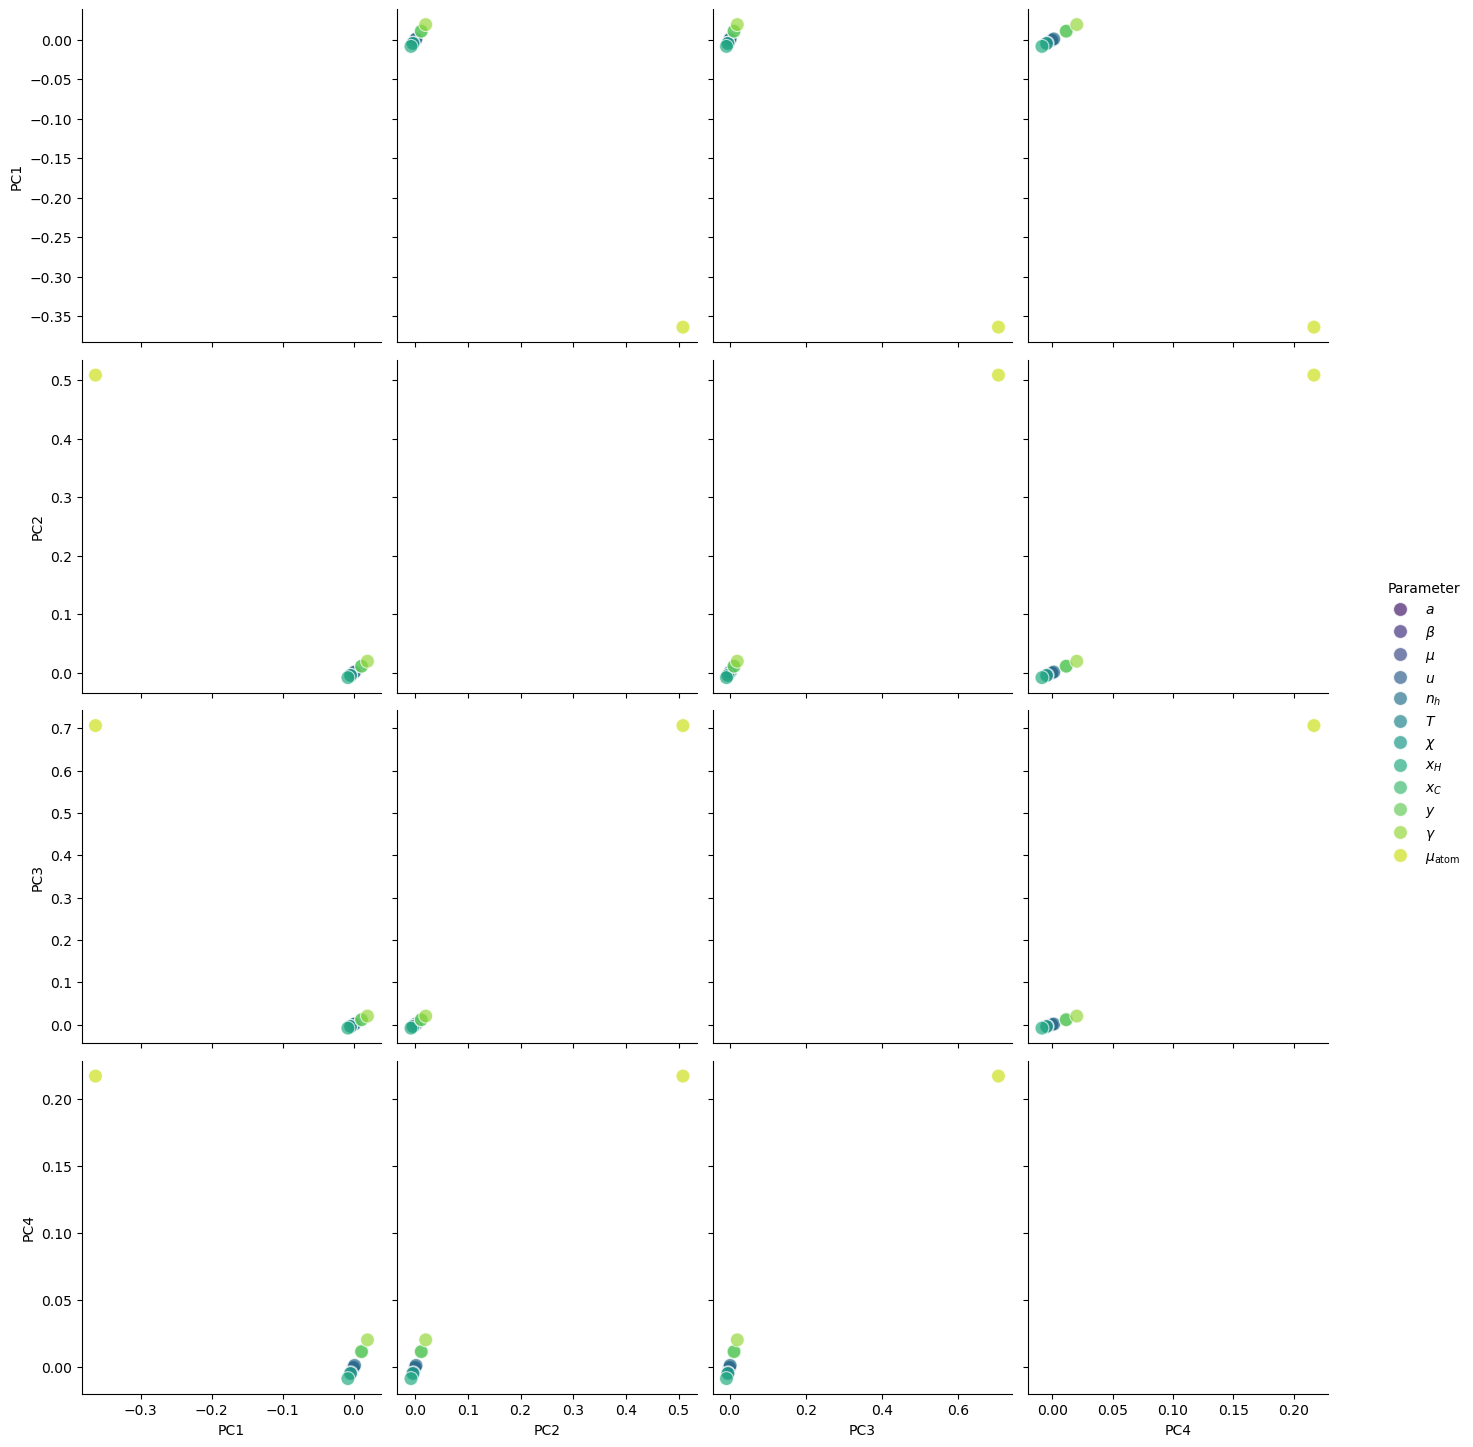

In [65]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(components[:,:4], 
                  columns=[f'PC{i+1}' for i in range(4)])
df['Parameter'] = my_labels

g = sns.pairplot(df, hue='Parameter', palette='viridis', 
                 plot_kws={'s': 100, 'alpha':0.7})
g.fig.set_size_inches(15,15)